In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%cd drive/My Drive

/content/drive/My Drive


In [0]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping





Using TensorFlow backend.


In [0]:
df = pd.read_csv('data10000.csv')

In [0]:
df = pd.read_csv('data10000.csv')
y= df['i_part_damage']
y = y.replace(-1, 0)
id0=np.where(y==0)[0]
y = np.concatenate((y,y[id0],y[id0],y[id0],y[id0],y[id0]))


11664

In [0]:
def load_dataset():
    df = pd.read_csv('data10000.csv')
#     df['new_label']=df['i_part_damage']*10+df['ratio_reduction']*100/5
#     y = df['new_label']
    y= df['i_part_damage']
    y = y.replace(-1, 0)
#     y= df['ratio_reduction'].values
    id0=np.where(y==0)[0]
#     y= y/0.05
#     y = np.array([int(yy) for yy in y])        
    y = np.concatenate((y,y[id0],y[id0]))
  
  
    with open('10000modeshape.p', 'rb') as f:
#     with open('1000moving.p', 'rb') as f:
        X = np.array(pickle.load(f))
#         for i in range(len(X)):
#           X[i] = (X[i]- np.amin(X[i])) / (np.amax(X[i]) - np.amin(X[i]))
        sha = np.shape(X)
#         X = X.reshape(-1, sha[2], sha[1])
        X = X.reshape(-1, sha[2]*sha[1], 1)
        X = np.concatenate((X,X[id0],X[id0]))
    
    trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=10)
    
    trainX = np.array(trainX)
    trainy = np.array(trainy)
    testX = np.array(testX)
    testy = np.array(testy)
    
    
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    
    
    
    return trainX, trainy, testX, testy

In [0]:
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(Conv1D(filters=30, kernel_size=5, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=30, kernel_size=5, activation='relu'))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Conv1D(filters=30, kernel_size=5, activation='relu'))
	model.add(Conv1D(filters=30, kernel_size=5, activation='relu'))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 	print(model.summary())

  # fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	
	  
	return model, accuracy

In [0]:
# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))


In [0]:
# run an experiment
def run_experiment(repeats=1):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		model, score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	print(model.summary())
	summarize_results(scores)

In [0]:
run_experiment()

>#1: 98.193
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_65 (Conv1D)           (None, 106, 30)           180       
_________________________________________________________________
conv1d_66 (Conv1D)           (None, 102, 30)           4530      
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 51, 30)            0         
_________________________________________________________________
conv1d_67 (Conv1D)           (None, 47, 30)            4530      
_________________________________________________________________
conv1d_68 (Conv1D)           (None, 43, 30)            4530      
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 21, 30)            0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 630)               0        

In [0]:
trainX, trainy, testX, testy = load_dataset()

In [0]:
testy[0:10]

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [0]:

df = pd.read_csv('data10000.csv')
y= df['ratio_reduction']/0.05
y = [int(yy) for yy in y]

In [0]:
trainX, trainy, testX, testy = load_dataset()
model, _ = evaluate_model(trainX, trainy, testX, testy)


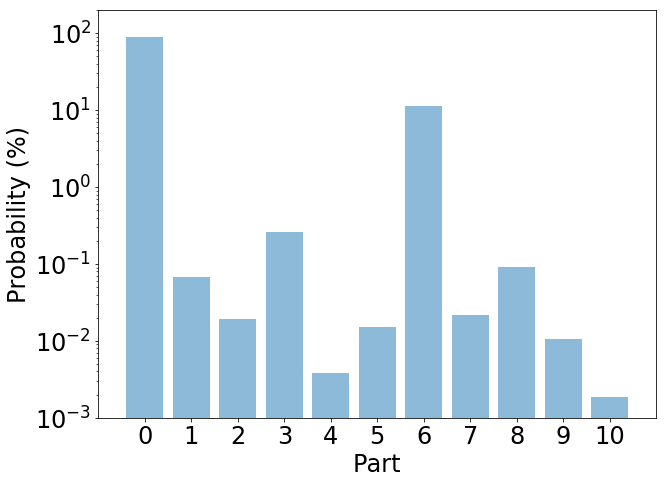

In [0]:

fig, ax = plt.subplots(figsize=(10,7.5))
index = [0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10] 
ax.bar(index, y_pred[741]*100, align='center', alpha=0.5)
ax.set_yscale("log")
ax.set_ylim(0.001, 200)
ax.set_xlim(-1, 11)
plt.xticks(np.arange(0, 11, step=1))
plt.ylabel('Probability (%)')
plt.xlabel('Part')
plt.rcParams.update({'font.size': 24})
plt.show()



In [0]:
# serialize model to JSON
model_json = model.to_json()
with open("96model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("96model.h5")
print("Saved model to disk")
 

Saved model to disk


In [0]:
trainX, trainy, testX, testy = load_dataset()
# while True:
model, score = evaluate_model(trainX, trainy, testX, testy)
print(score*100)
#   if score > 0.972:
#      break

96.86769518466573


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       1.00      0.90      0.95       202
           2       0.90      1.00      0.95       188
           3       1.00      1.00      1.00       174
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       193
           6       1.00      1.00      1.00       199
           7       1.00      1.00      1.00       204
           8       1.00      1.00      1.00       193
           9       0.80      1.00      0.89       189
          10       1.00      0.78      0.88       213

    accuracy                           0.97      2139
   macro avg       0.97      0.97      0.97      2139
weighted avg       0.97      0.97      0.97      2139



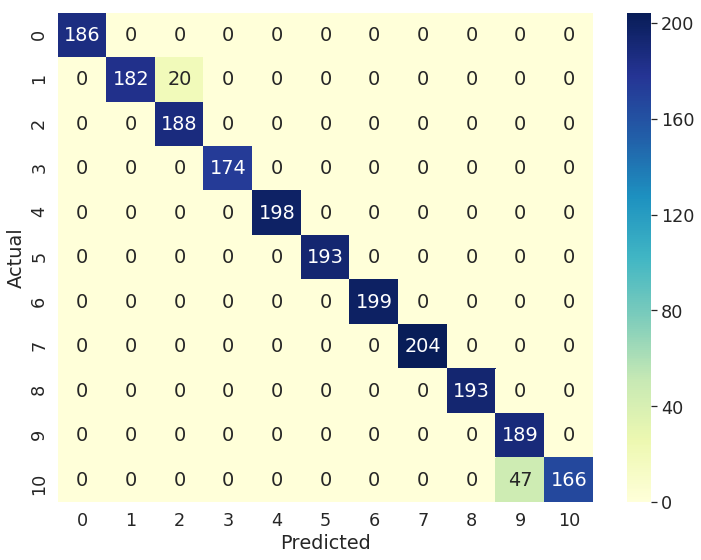

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt



y_pred=model.predict(testX)

print(classification_report(testy.argmax(axis=1), y_pred.argmax(axis=1)))

cm =confusion_matrix(testy.argmax(axis=1), y_pred.argmax(axis=1))  

index = [0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]  
columns = [0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]  

# index = ['Healthy','Minor', 'Medium', 'Severe']
# columns = ['Healthy','Minor', 'Medium', 'Severe']


cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(12,9))  
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
sns.set(font_scale=1.6)
sns.heatmap(cm_df, annot=True, cmap= "YlGnBu", fmt='g')

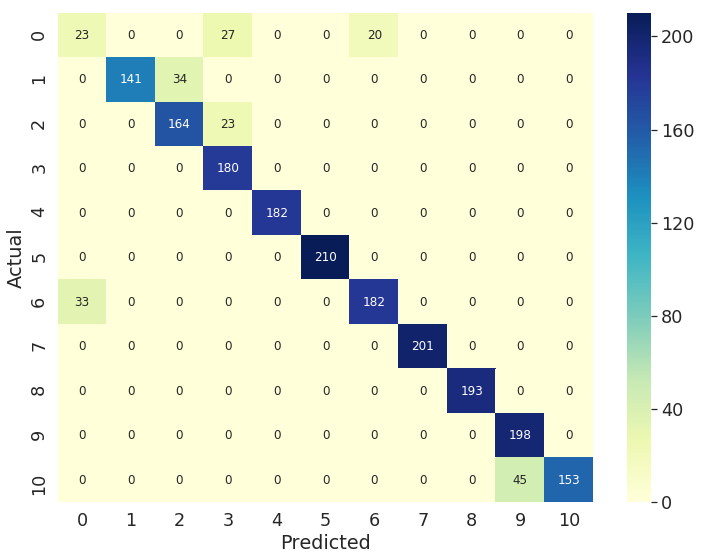

In [0]:
plt.figure(figsize=(12,9))  
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
sns.set(font_scale=1.6)
sns.heatmap(cm_df, annot=True, cmap= "YlGnBu",annot_kws={"size": 12}, fmt='g')

In [0]:
np.unique(testy.argmax(axis=1))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [0]:
print(classification_report(testy.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       204
           2       0.00      0.00      0.00       207
           3       0.00      0.00      0.00       202
           4       0.00      0.00      0.00       217
           5       0.00      0.00      0.00       166
           6       0.00      0.00      0.00       201
           7       0.00      0.00      0.00       174
           8       0.00      0.00      0.00       176
           9       0.00      0.00      0.00       196
          10       0.13      1.00      0.23       266

    accuracy                           0.13      2009
   macro avg       0.01      0.10      0.02      2009
weighted avg       0.02      0.13      0.03      2009



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:

y_pred

array([[1.91929568e-14, 1.12822801e-01, 1.51825085e-01, ...,
        3.27941030e-03, 3.14568430e-02, 1.13131933e-01],
       [1.49282205e-14, 3.40663493e-02, 9.15556774e-03, ...,
        1.78185165e-01, 2.15938091e-01, 1.06296264e-01],
       [2.14838133e-14, 3.18707079e-02, 8.07411596e-03, ...,
        1.26263246e-01, 1.67735919e-01, 9.90416333e-02],
       ...,
       [4.05546297e-14, 1.67571843e-01, 1.65569037e-01, ...,
        1.83983780e-02, 1.02110423e-01, 2.14900002e-01],
       [2.92381579e-17, 3.81717179e-03, 3.18515040e-02, ...,
        6.25976384e-07, 4.02182886e-05, 1.11787266e-03],
       [1.71202435e-14, 1.13944955e-01, 1.77077055e-01, ...,
        3.31263663e-03, 3.14629711e-02, 1.09711893e-01]], dtype=float32)

In [0]:
print(np.amax(trainX), np.amin(trainX))

0.00144802092108876 -0.0561778172850609


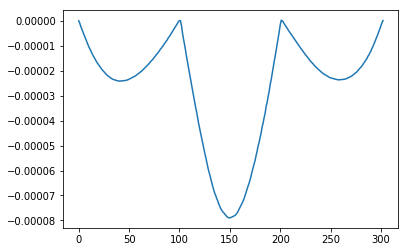

In [0]:
plt.plot(trainX[100])

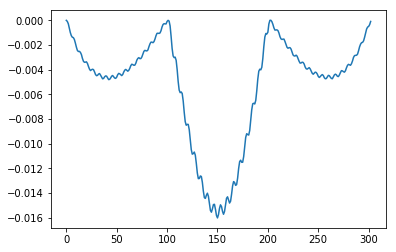

In [0]:
plt.plot(trainX[0])

In [0]:
labely = trainy.argmax(axis=1)

In [0]:
id = np.where(labely==1)
id2 = np.where(labely==2)
id8 = np.where(labely==8)


In [0]:
id[0][:10]

797

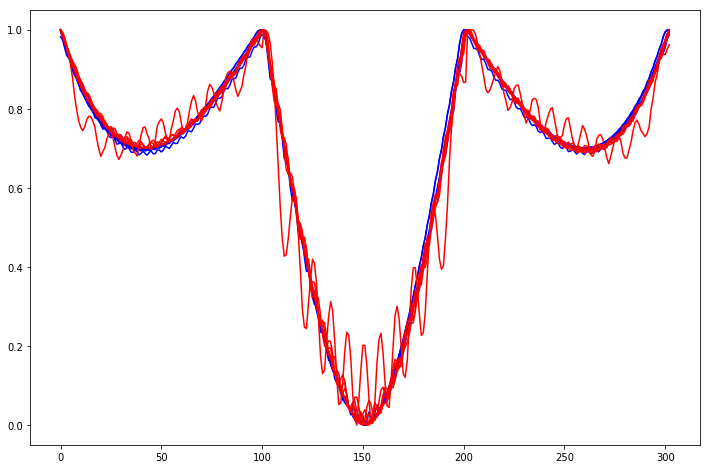

In [0]:
plt.figure(figsize=(12,8))

plt.plot(trainX[id[0][0]], 'b')
plt.plot(trainX[id[0][1]], 'b')
plt.plot(trainX[id[0][2]], 'b')
plt.plot(trainX[id[0][3]], 'b')
plt.plot(trainX[id[0][4]], 'b')
plt.plot(trainX[id[0][5]], 'b')

plt.plot(trainX[id8[0][0]], 'r')
plt.plot(trainX[id8[0][1]], 'r')
plt.plot(trainX[id8[0][2]], 'r')
plt.plot(trainX[id8[0][3]], 'r')
plt.plot(trainX[id8[0][4]], 'r')
plt.plot(trainX[id8[0][5]], 'r')


In [0]:
import scipy.fftpack

y = trainX[id[0][5]]

yf = scipy.fftpack.fft(y)

yf = np.fft.fft(y)


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


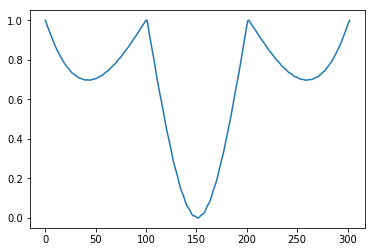

In [0]:
plt.plot(yf)


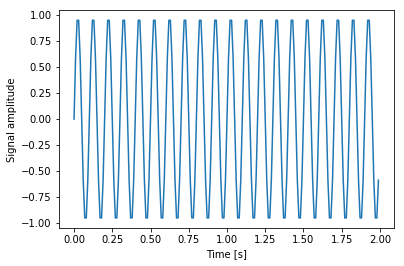

In [0]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

In [0]:
from scipy.fftpack import fft

x = trainX[id8[0][6]].ravel()
fx = fft(x)



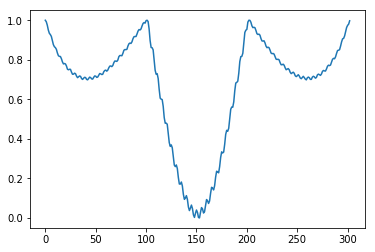

In [0]:
plt.plot(x)


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


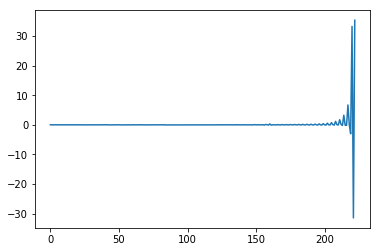

In [0]:
plt.plot(fx[80:])


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


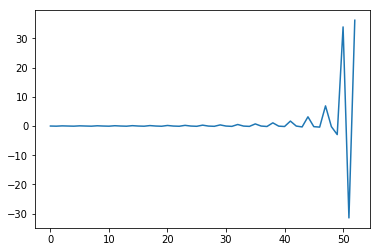

In [0]:
plt.plot(fx[250:])

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


100

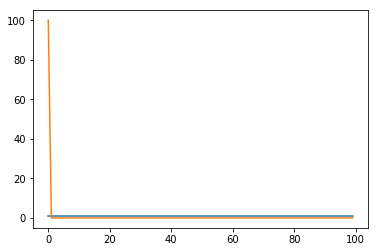

In [0]:
from scipy import fftpack

xx = np.arange(0,100)
x = np.ones((100))
X = fftpack.fft(x)

plt.plot(x)
plt.plot(X)
len(xx)

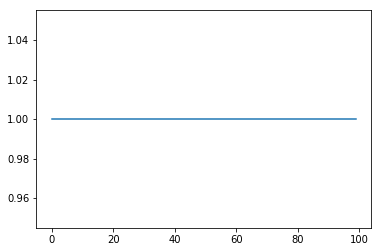

In [0]:
x = np.ones((100))
plt.plot(x)

In [0]:
array([[1.        ],
       [0.99225906],
       [0.9746442 ],
       [0.95062485],
       [0.93419949],
       [0.92762515],
       [0.91838106],
       [0.89844129],
       [0.87684621],
       [0.86632147],
       [0.86157478],
       [0.85290837],
       [0.83455324],
       [0.82075388],
       [0.81706486],
       [0.81669683],
       [0.80533825],
       [0.78949021],
       [0.77908992],
       [0.78102614]])

In [0]:
df = pd.read_csv('data10000.csv')
df['new_label']=df['i_part_damage']*10+df['ratio_reduction']*100/5
#     y = df['new_label']
y= df['i_part_damage']


y = y.replace(-1, 0)

In [0]:
yy = y.unique()

In [0]:
yy

array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [0]:
id = np.where(trainy==[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [0]:
id[0]

array([   0,    0,    0, ..., 8034, 8034, 8034])

In [0]:
to_categorical(yy)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [0]:
yyy = np.array([0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [0]:
to_categorical(yyy)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [0]:
y.head()

0    0
1    1
2    2
3    3
4    4
Name: i_part_damage, dtype: int64